___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочные задания по классификации текста - РЕШЕНИЯ

### На входе у Вас будет набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные (позитивные и негативные).

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

## Выполните задания, написанные жирным шрифтом!

**Задание: Выполните импорт библиотек и загрузите данные из файла в датафрейм pandas.** <br>
Данные для этого задания находятся в файле `'../DATA/moviereviews.csv'`.

In [54]:
# Напишите Ваш код в этой ячейке


In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('moviereviews.csv')

In [57]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Задание: Проверьте, есть ли какие-либо отсутствующие значения в этих данных.**

In [58]:
# Напишите Ваш код в этой ячейке


In [59]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Задание: Удалите отзывы о фильмах, текст которых принимает значение NaN**

In [60]:
df = df.dropna()

**Задание: Проверьте, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов. Как это можно проверить? Это можно сделать разными способами. После того как Вы найдёте такие отзывы, удалите их из датафрейма. [В качестве подсказки можете использовать эту ссылку.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [61]:
df['review'].str.isspace().sum()

27

In [62]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [63]:
df = df[~df['review'].str.isspace()]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Задание: Посчитайте количество строк для различных значений колонки label:**

In [65]:
# Напишите Ваш код в этой ячейке


In [66]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## Исследование данных (EDA) для мешка слов (bag of words)

**Бонусное задание: можете ли Вы с помощью модели CountVectorizer найти 20 наиболее часто встречающихся слов (которые не являются стоп-словами в английском языке), отдельно для каждого значения колонки label? Обратите внимание, что это бонусное задание, и здесь Вам нужно будет сделать нечто такое, что мы не проходили в лекциях. Однако мы надеемся, что с помощью поиска в Google или другом поисковике Вы сможете найти недостающие элементы.  [В качестве подсказки можете использовать эту ссылку.](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
count_vect = CountVectorizer(stop_words='english')

In [69]:
matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])

In [70]:
freqs_init = list(zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0]))
freqs = freqs_init.copy()
print(freqs)

[('00', 5), ('000', 60), ('007', 3), ('03', 2), ('04', 1), ('05', 2), ('05425', 1), ('10', 167), ('100', 39), ('1000', 7), ('100m', 3), ('101', 16), ('102', 10), ('103', 3), ('104', 1), ('105', 4), ('106', 3), ('107', 3), ('108', 2), ('10b', 1), ('10s', 1), ('10th', 2), ('11', 17), ('110', 1), ('113', 2), ('114', 1), ('115', 4), ('117', 1), ('11th', 2), ('12', 28), ('123', 1), ('125', 1), ('126', 2), ('127', 1), ('128', 1), ('129', 2), ('13', 42), ('130', 1), ('131', 1), ('132', 2), ('133', 1), ('137', 7), ('138', 1), ('13th', 28), ('14', 10), ('140', 1), ('1400', 1), ('15', 32), ('150', 1), ('1521', 1), ('157', 1), ('15th', 2), ('16', 11), ('1600', 6), ('1600s', 1), ('161', 1), ('1692', 1), ('16mm', 1), ('16x9', 2), ('17', 18), ('1700s', 1), ('1709', 1), ('172', 1), ('175', 1), ('17th', 5), ('18', 18), ('180', 2), ('1800s', 2), ('1812', 1), ('1865', 1), ('1869', 2), ('1871', 3), ('1885', 1), ('189', 1), ('1896', 1), ('1898', 1), ('18s', 1), ('18th', 3), ('19', 7), ('1900', 21), ('1900

### Данные и обучение модели

**Задание: Разделите данные на признаки X и целевую переменную y, а также выполните разбиение на обучающий и тестовый наборы данных (train/test split). Вы можете использовать любые значения параметров, но если Вы захотите свериться с блокнотом с решениями, то в нём мы использовали `test_size=0.20, random_state=101`**

In [71]:
# Напишите Ваш код в этой ячейке


In [72]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [86]:
X.head()

0    how do films like mouse hunt get into theatres...
1    some talented actresses are blessed with a dem...
2    this has been an extraordinary year for austra...
3    according to hollywood movies made in last few...
4    my first press screening of 1998 and already i...
Name: review, dtype: object

### Обучение модели

**Задание: Создайте пайплайн, в котором Вы создадите вектора TF-IDF из сырых текстовых даных, а затем обучите модель машинного обучения, которую сами выберете. После создания пайплайна выполните его обучение на обучающем наборе данных.**

In [73]:
# Напишите Ваш код в этой ячейке


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [76]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [77]:
# Подаём обучающие данные на вход в пайплайн
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Задание: выведите на экран отчёт "classification report" и матрицу ошибок для результатов работы пайплайна на тестовых данных.**

In [ ]:
# Напишите Ваш код в этой ячейке


In [78]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [79]:
preds = pipe.predict(X_test)

In [87]:
preds

array(['neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg',

In [80]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



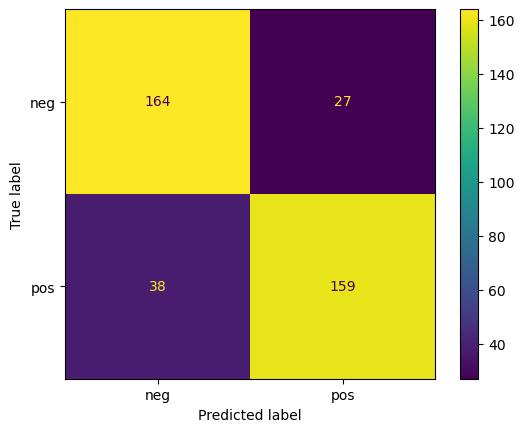

In [84]:
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test)

## Отличная работа!